In [52]:
# Imports

import random
import pandas as pd

import urllib.request
import json

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = ['Noto Sans CJK TC']
plt.rcParams['figure.figsize'] = [12, 10]

# 例子 Examples

## 抽獎

In [53]:

names = [
    'Samuel',
    'Mary',
    'Peter',
    'Billy',
    'Thomas',
    'Joe',
]

index = random.randrange(0, len(names))
print(names[index])

print(random.choices(names, k=2)) # Note: Two name might be the same

Billy
['Joe', 'Thomas']


## 讀取 CSV 

In [54]:
data = pd.read_csv('./data/data.csv')
data

,id,name,username,email,address/street,address/suite,address/city,address/zipcode,address/geo/lat,address/geo/lng,phone,website,company/name,company/catchPhrase,company/bs
0,1,Leanne Graham,Bret,Sincere@april.biz,Kulas Light,Apt. 556,Gwenborough,92998-3874,-37.3159,81.1496,1-770-736-8031 x56442,hildegard.org,Romaguera-Crona,Multi-layered client-server neural-net,harness real-time e-markets
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,Victor Plains,Suite 879,Wisokyburgh,90566-7771,-43.9509,-34.4618,010-692-6593 x09125,anastasia.net,Deckow-Crist,Proactive didactic contingency,synergize scalable supply-chains
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,Douglas Extension,Suite 847,McKenziehaven,59590-4157,-68.6102,-47.0653,1-463-123-4447,ramiro.info,Romaguera-Jacobson,Face to face bifurcated interface,e-enable strategic applications
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,Hoeger Mall,Apt. 692,South Elvis,53919-4257,29.4572,-164.2990,493-170-9623 x156,kale.biz,Robel-Corkery,Multi-tiered zero tolerance productivity,transition cutting-edge web services
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,Skiles Walks,Suite 351,Roscoeview,33263,-31.8129,62.5342,(254)954-1289,demarco.info,Keebler LLC,User-centric fault-tolerant solution,revolutionize end-to-end systems
5,6,Mrs. Dennis Schulist,Leopoldo_Corkery,Karley_Dach@jasper.info,Norberto Crossing,Apt. 950,South Christy,23505-1337,-71.4197,71.7478,1-477-935-8478 x6430,ola.org,Considine-Lockman,Synchronised bottom-line interface,e-enable innovative applications
6,7,Kurtis Weissnat,Elwyn.Skiles,Telly.Hoeger@billy.biz,Rex Trail,Suite 280,Howemouth,58804-1099,24.8918,21.8984,210.067.6132,elvis.io,Johns Group,Configurable multimedia task-force,generate enterprise e-tailers
7,8,Nicholas Runolfsdottir V,Maxime_Nienow,Sherwood@rosamond.me,Ellsworth Summit,Suite 729,Aliyaview,45169,-14.3990,-120.7677,586.493.6943 x140,jacynthe.com,Abernathy Group,Implemented secondary concept,e-enable extensible e-tailers
8,9,Glenna Reichert,Delphine,Chaim_McDermott@dana.io,Dayna Park,Suite 449,Bartholomebury,76495-3109,24.6463,-168.8889,(775)976-6794 x41206,conrad.com,Yost and Sons,Switchable contextually-based project,aggregate real-time technologies
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,Kattie Turnpike,Suite 198,Lebsackbury,31428-2261,-38.2386,57.2232,024-648-3804,ambrose.net,Hoeger LLC,Centralized empowering task-force,target end-to-end models


## 網絡抓取資料 (API)

In [55]:


response = urllib.request.urlopen('https://jsonplaceholder.typicode.com/users/1/posts')
data = response.read().decode('utf-8')

posts = json.loads(data)
list(map(lambda d: d['title'], posts))

['sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
 'qui est esse',
 'ea molestias quasi exercitationem repellat qui ipsa sit aut',
 'eum et est occaecati',
 'nesciunt quas odio',
 'dolorem eum magni eos aperiam quia',
 'magnam facilis autem',
 'dolorem dolore est ipsam',
 'nesciunt iure omnis dolorem tempora et accusantium',
 'optio molestias id quia eum']

## 繪畫圖表

資料來源: [DATA.gov.mo 入境旅客](https://data.gov.mo/Detail?id=3546225a-2a34-4645-b01e-6752aed03993)

<AxesSubplot:title={'center':'Visitors to Macau'}, xlabel='Year', ylabel='Visitors (millions)'>

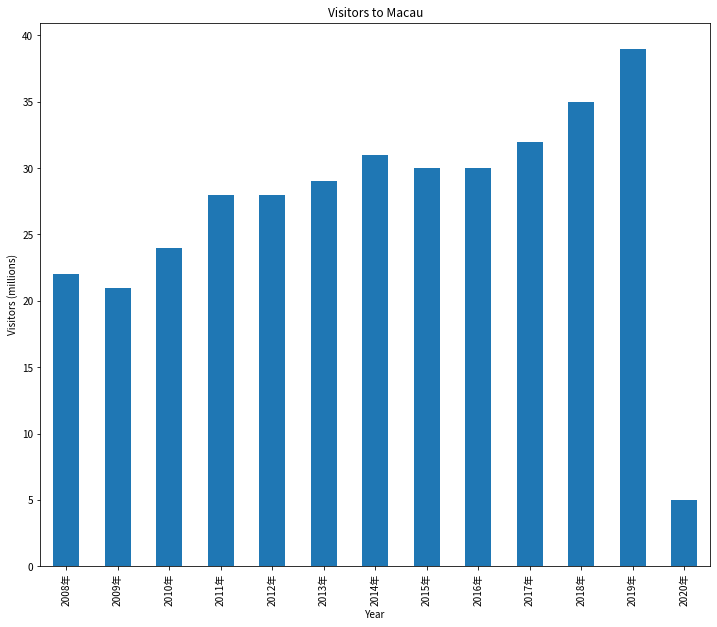

In [56]:
import pandas as pd

df = pd.read_excel('./data/visitorArrivals.xlsx')
result = df[df['period'].str.contains('^[0-9]{4}年$')].sort_values(by='period')
result['value'] = result['value'].transform(lambda v: v//(10**6))

result.plot(kind='bar', x='period', y='value', xlabel='Year', ylabel='Visitors (millions)', title='Visitors to Macau', legend = False)

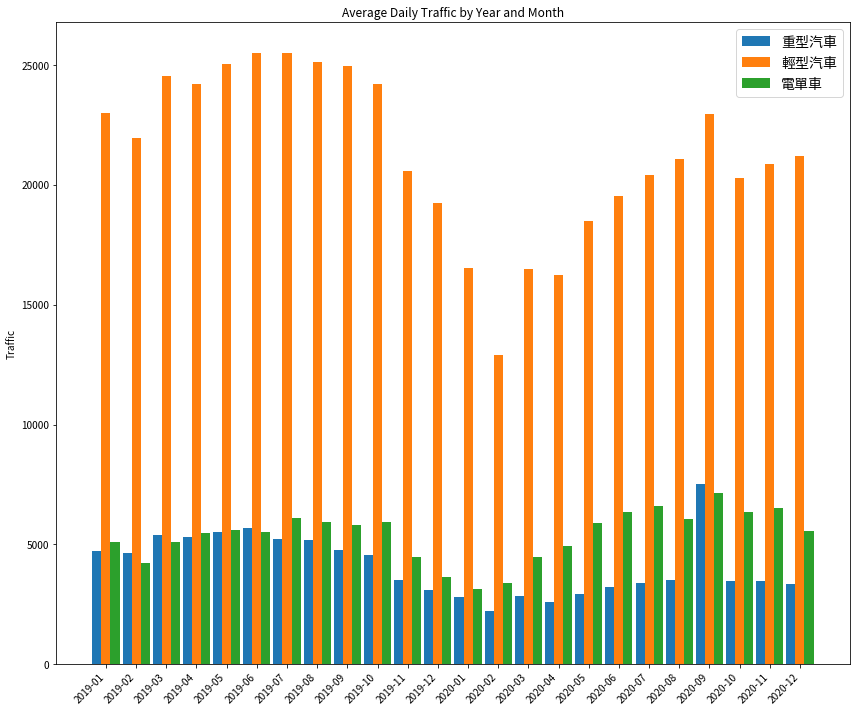

In [57]:
df = pd.read_excel('./data/Bridge_traffic_flow_Amizade.xlsx', skiprows=1) # First row is empty :(
df.columns = df.columns.str.strip() # There are white space in the column header

# grouped by year and month
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-1')
result = df.sort_values('date').query('item == "澳門 ---> 氹仔"')
# result
grouped = result.groupby('subitem')

labels = grouped.get_group('電單車')['date'].transform(lambda v:'{0:%Y}-{0:%m}'.format(v))
width = 0.9
x = np.arange(len(labels))

fig, ax = plt.subplots()

ax.bar(x - width / 3, grouped.get_group('重型汽車')['amount'], width = width / 3, label='重型汽車')
ax.bar(x, grouped.get_group('輕型汽車')['amount'], width = width / 3, label='輕型汽車')
ax.bar(x + width / 3, grouped.get_group('電單車')['amount'], width = width / 3, label='電單車')
 
ax.set_title('Average Daily Traffic by Year and Month')
ax.set_ylabel('Traffic')
ax.set_xticks(x, labels, rotation=45, horizontalalignment='right')
ax.legend(fontsize=14)

fig.tight_layout()
plt.show()